# Licence


### Python implementation of the following One-Dimensional Optimization Methods

- Successive quadratic estimations
- Newton-Raphson 
- Cuasi Newton
- Bisection
- Secant 

Copyright (C) 2021 Juan Luis Ruiz Vanegas (juanluisruiz971@comunidad.unam.mx)

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program. If not, see https://www.gnu.org/licenses/.


# 1. Find the optimal solution to the following problem:

$max f(x) = \frac{0.5}{\sqrt{1+x^2}} - \sqrt{1+x^2} (1 - \frac{0.5}{1+x^2}) + x$

## Plotting the function to make a first analysis of the maximum point

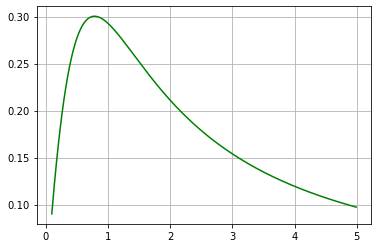

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return ( (0.5/(sqrt(1+x**2))) - (sqrt(1+x**2)) * (1- (0.5/(1+x**2))) +x )

vecfunc = np.vectorize(f)

d = np.arange(0.1, 5.0, 0.01)
T = vecfunc(d)
plt.plot (d, T, 'g')
plt.grid()
plt.show()

## Calculating the derivatives 

In [23]:
from sympy import *
x = Symbol('x')

formule = '(0.5/(sqrt(1+x**2))) - (sqrt(1+x**2)) * (1- (0.5/(1+x**2))) +x '

y = sympify(formule)
f1 = y.diff(x)
f2 = f1.diff(x)
print(f1,"\n",f2)

-x*(1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5*x/(x**2 + 1)**(3/2) + 1 
 x**2*(1 - 0.5/(x**2 + 1))/(x**2 + 1)**(3/2) + 3.5*x**2/(x**2 + 1)**(5/2) - (1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5/(x**2 + 1)**(3/2)


In [3]:
from math import sqrt

## * The following methods assume minimization *

The problem asks us to maximize $f(x)$, so the sign of the objective function must be changed.

- (a) (15 points) Using the successive quadratic estimations method. The input to your program will be: $x_0 = 0$, $\Delta = 0.1$ and $\epsilon_1 = 0.0001$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f(x)$ performed by your program.

- (b) (15 points) Using the Newton - Raphson method. The input to your program will be: $x_0 = 0$, and $\epsilon_1 = 0.0001$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f^\prime(x)$ performed by your program. In addition, you must include in your report the calculation of the first and second derivative $(f^\prime(x)$ and $f^{\prime\prime}(x))$

- (c) (15 points) Using the Cuasi Newton method. The input to your program will be: $x_0 = 0$, y $\epsilon_1 = 0.0001$ and $\Delta = 0.01$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f(x)$ performed by your program.

- (d) (15 points) Using the Bisection method. The input to your program will be: $a = 0$, $b = 5$, and $\epsilon_1 = 0.0001$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f^\prime(x)$ performed by your program.

In [6]:
def f1(x):
    """
    First derivative of the function. 
    """
    global evalF
    evalF += 1
    
    return - ( -x/sqrt(1 + x**2) - x/(1 + x**2)**(3/2) + 1 ) 
    
def Bisection():    
    a, b, epsilon  = 0.0, 5, 1e-4
    """
    uncomment the next line line to enter an input from the console, 
    in the format indicated and on a single line,
    separated by a comma"""
    #a, b, epsilon = [float(i) for i in input().split(",")]
    
    if( f1(a)<0 and f1(b)>0 ):
        while( True ):        
            z = (a+b)/2
            f1_z = f1(z)
            if( f1_z< 0 ):
                a = z
            else:
                b = z
                
            if( abs(f1_z) <= epsilon ):
                break
        
        return ( print("x* = {0:.3f}\nf(x*) = {1:.3f}\nEvaluations of f'(x) = {2}".format(z, f(z), evalF)) )
    else:
        return (print ("Error") )
    
    
    
if __name__=="__main__":
    evalF = 0
    Bisection()

x* = 0.786
f(x*) = 1.709
Evaluations of f'(x) = 12


- (e) (15 points) Using the Secant method. The input to your program will be: $a = 0$, $b = 5$, and $\epsilon_1 = 0.0001$. You should report the value obtained for $x^*$, $f(x^*)$ and the number of evaluations of $f^\prime(x)$ performed by your program.

In [5]:
def f1(x):
    global evalF
    evalF += 1
    return -(-x*(1 - 0.5/(x**2 + 1))/sqrt(x**2 + 1) - 1.5*x/(x**2 + 1)**(3/2) + 1)

def Secante():
    xL, xR , epsilon = 0.1, 5, 1e-4
    """
    uncomment the next line line to enter an input from the console, 
    in the format indicated and on a single line,
    separated by a comma"""
    #xL, xR , epsilon = [float(i) for i in input().split(",")]
    f1xL, f1xR = f1(xL), f1(xR)
    
    if( f1xL*f1xR < 0 ):
        while( True ):        
            z = xR - ( ( f1xR*(xR-xL) )/( f1xR-f1xL ) )
            f1_z = f1(z)
            if( f1_z< 0 ):
                xL = z
                f1xL = f1_z
            else:
                xR = z
                f1xR = f1_z
            if( abs(f1_z) <= epsilon ):
                break
            
        return ( print("x* = {0:.3f}\nf(x*) = {1:.3f}\nEvaluations of f'(x) = {2}".format(z, f(z), evalF)) )
    else:
        return (print ("Error") )
    
    
    
if __name__=="__main__":
    evalF = 0
    Secante()

x* = 0.786
f(x*) = 1.709
Evaluations of f'(x) = 49


# 3. (20 points) Use the method of your choice to solve the following problem:  

$min  g(x) = e^x - x^3$

Indicate the input parameters you used and plot the function $g(x)$ in an interval containing the optimal solution.

## _Since these algorithms assume maximization, we will do the equivalent by multiplying $g(x)$ by $-1$_

## Plotting the function to make a first analysis of the maximum point

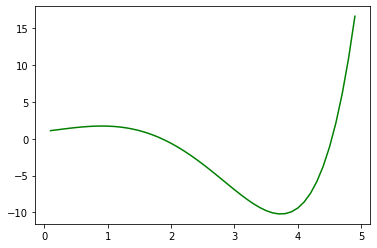

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import e
def f(x):
    return ( e**x - x**3 )

vecfunc = np.vectorize(f)

d = np.arange(0.1, 5.0, 0.1)
T = vecfunc(d)
plt.plot (d, T, 'g')
#plt.grid()
plt.show()

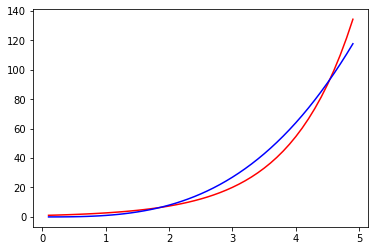

In [33]:
from numpy import *
import math
import matplotlib.pyplot as plt

x = np.arange(0.1, 5.0, 0.1)
a = math.e**x
b = x**3


plt.plot(x, a, 'r') # plotting t, a separately 
plt.plot(x, b, 'b') # plotting t, b separately 

plt.show()